### R Setup

In [2]:
#!pip install -q rpy2
#%load_ext rpy2.ipython

#test
#%%R
#x<- c(1,2,3)
#mean(x)

### Read data with Python

In [3]:
#Data Upload
#from google.colab import files
#uploaded = files.upload()

### AE data analysis

In [1]:
#Read data
import pandas as pd

ae=pd.read_sas("ae.xpt", format="xport")
dm=pd.read_sas("dm.xpt", format="xport")

# Convert byte strings to regular strings
dataframes = [dm, ae]

for df in dataframes:
  for col in df.columns:
    df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

#Data merge
merged_ae = pd.merge(ae, dm, on="USUBJID", how="left")

#check
print(merged_ae.head())
#print(merged_ae.shape)
#merged_ae["USUBJID"].nunique()



      STUDYID_x DOMAIN_x      USUBJID  AESEQ AESPID  \
0  CDISCPILOT01       AE  01-701-1015    1.0    E07   
1  CDISCPILOT01       AE  01-701-1015    2.0    E08   
2  CDISCPILOT01       AE  01-701-1015    3.0    E06   
3  CDISCPILOT01       AE  01-701-1023    3.0    E10   
4  CDISCPILOT01       AE  01-701-1023    1.0    E08   

                                 AETERM                     AELLT  AELLTCD  \
0             APPLICATION SITE ERYTHEMA  APPLICATION SITE REDNESS      NaN   
1             APPLICATION SITE PRURITUS  APPLICATION SITE ITCHING      NaN   
2                             DIARRHOEA                  DIARRHEA      NaN   
3  ATRIOVENTRICULAR BLOCK SECOND DEGREE    AV BLOCK SECOND DEGREE      NaN   
4                              ERYTHEMA                  ERYTHEMA      NaN   

                                AEDECOD  AEPTCD  ... SEX   RACE  \
0             APPLICATION SITE ERYTHEMA     NaN  ...   F  WHITE   
1             APPLICATION SITE PRURITUS     NaN  ...   F  WHITE   

### Bar plot

Matplotlib is building the font cache; this may take a moment.


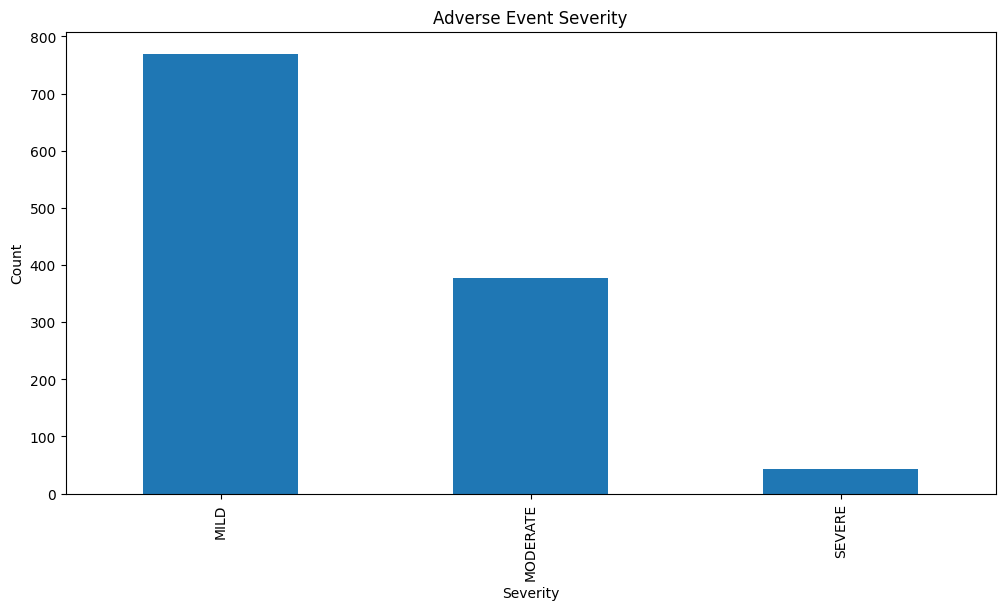

In [2]:
#Bar plot N of AE per subject
import matplotlib.pyplot as plt

ae_counts = merged_ae['AESEV'].value_counts()
ae_counts.plot(kind='bar', figsize=(12,6))
plt.title("Adverse Event Severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()


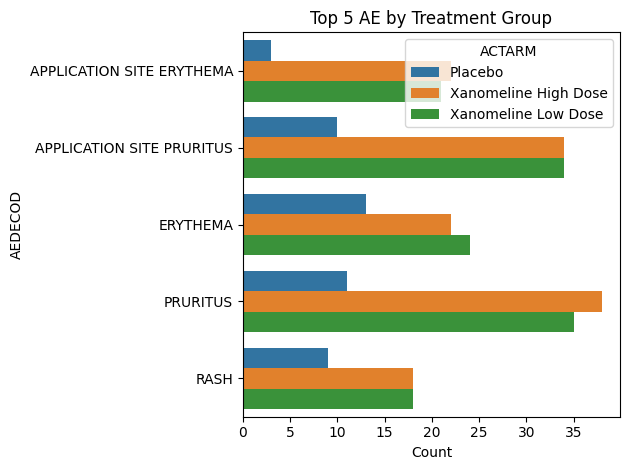

In [3]:
import seaborn as sns

#Top 5 AEs
top_ae = merged_ae['AEDECOD'].value_counts().nlargest(5).index
df_top = merged_ae[merged_ae['AEDECOD'].isin(top_ae)]

sns.countplot(data=df_top, y='AEDECOD', hue='ACTARM')
plt.title('Top 5 AE by Treatment Group')
plt.xlabel('Count')
plt.ylabel('AEDECOD')
plt.tight_layout()
plt.show()